In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
np.random.seed(42)

In [2]:
path = "./datasets/Testing"
print(path)

./datasets/Testing


In [3]:
numberIMG = {}
for dir in os.listdir(path):
    numberIMG[dir] = len(os.listdir(os.path.join(path,dir)))
numberIMG.items()

dict_items([('pituitary', 152), ('notumor', 205), ('glioma', 152), ('meningioma', 155)])

In [4]:
if not os.path.exists("./datasets/Validating"):
    os.mkdir("./datasets/Validating")

    for dir in os.listdir("./datasets/Testing"):
        os.makedirs("./datasets/Validating/"+dir)
        for img in np.random.choice(a = os.listdir(os.path.join("./datasets/Testing", dir)), size=(math.floor(0.5*numberIMG[dir])-2), replace=False ):
            o = os.path.join("./datasets/Testing", dir, img)
            d = os.path.join("./datasets/Validating",dir)
            shutil.copy(o,d)
            os.remove(o)
else:
    print("Folder exists")

Folder exists


In [5]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, BatchNormalization, GlobalAvgPool2D, Dense

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224,224,3)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

model.add(GlobalAvgPool2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # 4 classes


/Users/ritvijgopal/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
def prepeocessingIMG1(path):
    img_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, rescale= 1/255, horizontal_flip= True)
    image = img_data.flow_from_directory(directory= path, target_size= (224,224), batch_size= 32, class_mode = 'categorical')

    return image

In [26]:

train_data = prepeocessingIMG1("./datasets/Training")

Found 5712 images belonging to 4 classes.


In [27]:
def prepeocessingIMG2(path):
    img_data = ImageDataGenerator(rescale= 1/255)
    image = img_data.flow_from_directory(directory= path, target_size= (224,224), batch_size= 32, class_mode = 'categorical')

    return image

In [28]:
path = "./datasets/Testing"
test_data = prepeocessingIMG2(path)

Found 664 images belonging to 4 classes.


In [29]:
path = "./datasets/Validating"
val_data = prepeocessingIMG2(path)

Found 647 images belonging to 4 classes.


In [30]:
# early stopping and model checkpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor="val_accuracy", patience=5, verbose=1, restore_best_weights=True)

#model checkpoint
mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.h5", verbose= 1, save_best_only= True, mode = 'auto')

cd = [es,mc]


In [31]:
steps_per_epoch = train_data.samples // train_data.batch_size
validation_steps = val_data.samples // val_data.batch_size

model.fit(
    train_data,
    validation_data=val_data,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    epochs=50,
    callbacks=cd  # if used
)



/Users/ritvijgopal/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
 41/178 ━━━━━━━━━━━━━━━━━━━━ 11:18 5s/step - accuracy: 0.5061 - loss: 1.1304

KeyboardInterrupt: 

In [15]:
h = hs.history
h.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

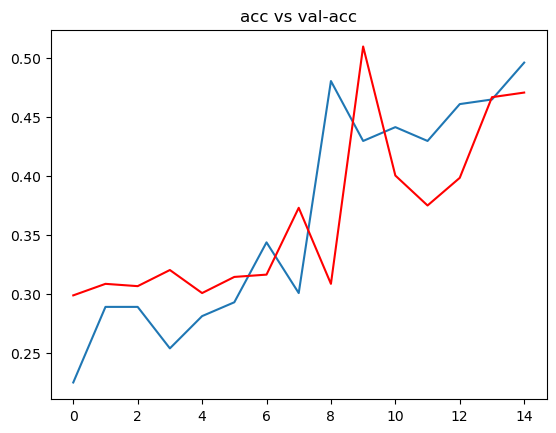

In [16]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')

plt.title("acc vs val-acc")
plt.show()

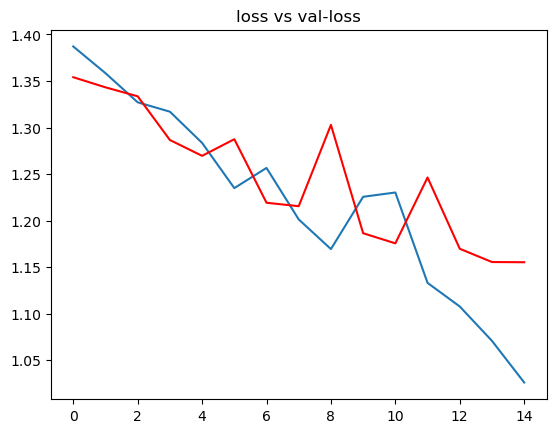

In [17]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')

plt.title("loss vs val-loss")
plt.show()

In [18]:
from keras.models import load_model

In [19]:
model = load_model("./bestmodel.h5")

In [20]:
acc = model.evaluate(test_data)[1]

print(f"the accuracy is {acc*100} %")

21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 441ms/step - accuracy: 0.5094 - loss: 1.1679
the accuracy is 54.066264629364014 %


In [21]:
from keras.preprocessing.image import load_img, img_to_array

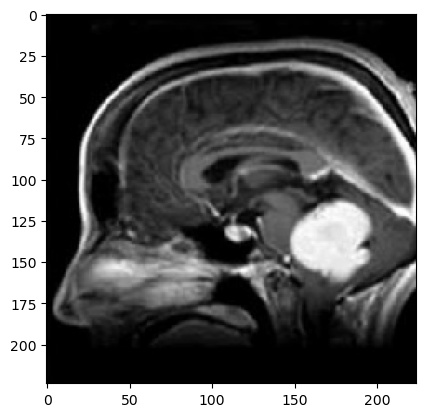

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Model predicted: notumor


In [22]:
path = "datasets/Testing/meningioma/Te-me_0030.jpg"
img = load_img(path, target_size=(224,224))
input_array = img_to_array(img)/255

plt.imshow(input_array)
plt.show()

input_array.shape
input_array = np.expand_dims(input_array, axis=0)

pred = model.predict(input_array)[0]
predicted_index = np.argmax(pred)
index_to_class = {v: k for k, v in train_data.class_indices.items()}
predicted_label = index_to_class[predicted_index]

print("Model predicted:", predicted_label)
